# YOLO3

### 1. Bounding box prediction

YOLO2 predicts that bounding boxes use anchor boxes. This network predicts 4 coordinates for each bounding box: tx, ty, tw, and th. (Cx, cy) represents the coordinates of the upper-left corner of the current grid offset from the upper-left corner of the image. Distance, with pw, ph representing the width and height of the prior box (piror), we can get the following formula:

        

During training, a sum of squared error loss is used. True value by said gradient is the true value minus the predicted value: .

YOLO3 uses logistic regression to predict a score for each bounding box. The algorithm only matches an optimal prior box for each truth value.

### 2. Multi-label prediction

Each bounding box may contain multiple types of objects, that is, multi-label prediction. So logistic (sigmoid) is used instead of softmax, because softmax indicates that each box has only one type of object, and sigmoid can predict multi-label classification . So how to use sigmoid for multi-label classification? In fact, a sigmoid classifier is applied to the results of each classification calculation in logits to determine whether the sample belongs to a certain category. During training, a binary cross-entropy loss function is used for class prediction.

### 3. Combine the characteristics of different convolutional layers to extract more fine-grained information and make multi-scale predictions

YOLO3 uses three different scales to predict the boxes. The network uses a similar feature pyramid concept to extract features from different scales. Several new convolutional layers were added to the original basic feature extractor . Finally, a 3-dimensional tensor was used to represent the bounding box, objectness, and class predictions. In COCO, 3 boxes are predicted on each scale, so the tensor is N * N * [3 * (4 + 1 + 80)], which corresponds to 4 bounding boxes, 1 objectness prediction, and 80 class predictions, respectively. . Next, extract the feature map from the previous two layers and upsample it 2 times. Take a feature map from an earlier network and use tandem to merge it with the up-sampled features. This approach allows us to obtain more meaningful semantic information from the up-sampled features and finer-grained information from earlier feature maps. Then add some convolutional layers to process this combined feature map, and finally predict a similar tensor , although it is now twice the size. Perform the same design again to predict the size of the final box. In the past, YOLO had difficulty predicting small objects, but now it has improved significantly through multi-scale prediction.


### 4. Network structure ( DarkNet53 = Darknet19 + ResNet )

Combine the residual thought to extract deeper semantic information.
Continuous 3 × 3 and 1 × 1 convolutional layers are still used.
Prediction is performed on three different scales by upsampling. For example, the 8 * 8 feature map upsampling and the 16 * 16 feature map are added and calculated again, so that smaller objects can be predicted.
A convolutional layer with a step size of 2 is used instead of the pooling layer because the pooling layer will lose information. as the picture shows:

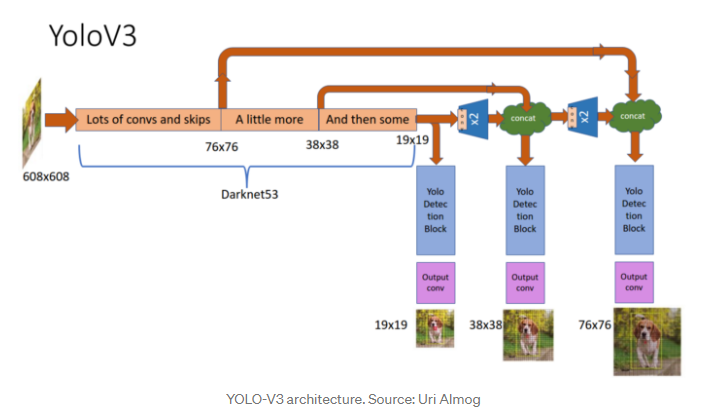

### 5.Predict more targets

YOLO3 still uses k-means clustering to determine template boxes and predict 9 bounding boxes for each grid (only 5 in YOLO2 and only 2 in YOLO1), which can improve recall.

### 6. Loss function

During training, a binary cross-entropy loss function is used for class prediction. The last three terms of the YOLO v2 loss function are squared errors, while YOLO v3 is changed to a cross-entropy error term, which means that YOLO v3's item confidence and separation prediction use a logistic regression algorithm.

## What improved ?
-  average precision for small objects improved, it is now better than Faster RCNN but Retinanet is still better in this.
- As MAP increased localization errors decreased.
- Predictions at different scales or aspect ratios for same object improved because of the addition of feature pyramid like method(They should have named this).
- And, MAP increased significantly.

**background**
- YOLOv3 is not intended to solve any problem, the whole paper is actually a technical report.
- YOLOv3 has made some small improvements based on YOLOv2, the article is not long, the core idea is similar to YOLOv2, YOLO9000.
**Model improvements**

- Bounding box prediction: The positioning task uses an anchor box to predict the boundary box. YOLOv3 uses logistic regression to predict an objectness score for each bounding box. The score is based on the degree of overlap between the prediction box and the object. If the overlap of a certain box is higher than that of other boxes, its score is 1, and ignore those boxes that are not the best boxes and whose overlap is greater than a certain threshold (0.5)
- Category prediction: Like YOLOv2, YOLOv3 still adopts multi-label classification
- Multi-scale prediction
- Use the new network Darknet-53 to extract features

## Difference and advantages
- There are major differences between YOLOv3 and older versions in terms of speed, precision and specificity of classes. 
- YOLOv3 increased the AP for small objects by 13.3, which is a massive advance from YOLOv2. However, the average precision (AP) for all objects (small, medium, large) is still less than RetinaNet

## disadvantage
- The YOLOv3 AP does indicate a trade-off between speed and accuracy for using YOLO when compared to RetinaNet, since RetinaNet training time is greater than YOLOv3. The accuracy of detecting objects with YOLOv3 can be made equal to the accuracy when using RetinaNet by having a larger dataset, which makes it an ideal option for models that can be trained with large datasets. An example of this would be common detection models like traffic detection, where plenty of data can be used to train the model since the number of images of different vehicles is plentiful. YOLOv3 may not be ideal to use with niche models where large datasets can be hard to obtain.

